In [2]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [3]:
import pandas as pd
df = pd.read_csv (r"C:\Users\User\Downloads\LogisticRegressionusingPython\Logistic Regression using Python\xAPI-Edu-Data.csv")

#first few rows
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [4]:
df=df.drop(['NationalITy','StageID','GradeID','SectionID','Semester'],axis=1)
df


,gender,PlaceofBirth,Topic,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KuwaIT,IT,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KuwaIT,IT,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KuwaIT,IT,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KuwaIT,IT,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KuwaIT,IT,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Chemistry,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Geology,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Geology,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,History,Father,30,17,14,57,No,Bad,Above-7,L


Justificaion for droping columns NationalITy is simailar column for placeof birth (which plays important role).StageID,GradeID,SectionID are id they are representational.they donot impact on performance of student.

# Q4 start

# factors that leads to get low grades of the students.

In [31]:
e=df[df['Class']=='L']
e

,gender,PlaceofBirth,Topic,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
2,M,KuwaIT,IT,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KuwaIT,IT,Father,30,25,5,35,No,Bad,Above-7,L
6,M,KuwaIT,Math,Father,35,12,0,17,No,Bad,Above-7,L
12,M,KuwaIT,IT,Father,5,1,0,11,No,Bad,Above-7,L
13,M,lebanon,Math,Father,20,14,12,19,No,Bad,Above-7,L
...,...,...,...,...,...,...,...,...,...,...,...,...
469,F,Jordan,Chemistry,Father,9,6,15,85,No,Bad,Above-7,L
474,F,Jordan,Chemistry,Father,2,7,4,8,No,Bad,Above-7,L
475,F,Jordan,Chemistry,Father,5,4,5,8,No,Bad,Above-7,L
478,F,Jordan,History,Father,30,17,14,57,No,Bad,Above-7,L


# we can see ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays these all are no,bad,above-7,Father respectively. This has become a benchmark for low in class.

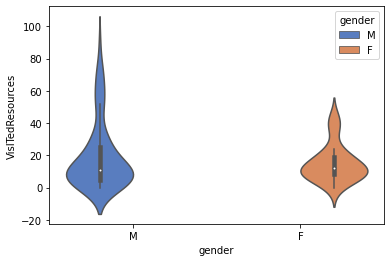

In [32]:
ax = sns.violinplot(x="gender", y="VisITedResources", hue="gender",
                    data=e, palette="muted")

# Male have slightly more percentage than Female for class low. 

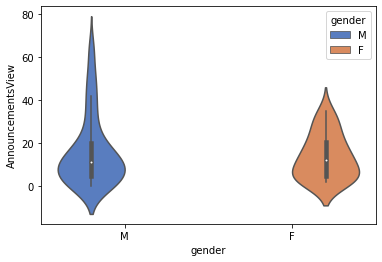

In [33]:
ax = sns.violinplot(x="gender", y="AnnouncementsView", hue="gender",
                    data=e, palette="muted")

# Male and female have similar range of percentage for annoucementview  for class low. just from 20-80 male are higher.

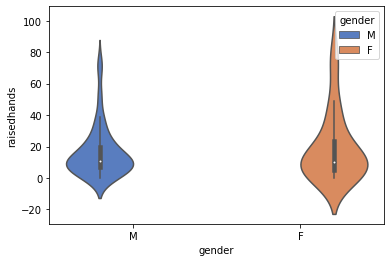

In [34]:
ax = sns.violinplot(x="gender", y="raisedhands", hue="gender",
                    data=e, palette="muted")

# Female have  percentage higher in  raising hands.

# odds of men are more with being kuwaitian or jordanian  they are more likely to get low compare to females. Disscussion are not usefull for female as their percentage being  double than men, they get a low.

<AxesSubplot:xlabel='PlaceofBirth', ylabel='raisedhands'>

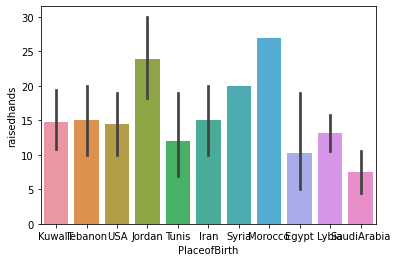

In [35]:
sns.barplot(x='PlaceofBirth',y='raisedhands',data=e)

<AxesSubplot:xlabel='PlaceofBirth', ylabel='VisITedResources'>

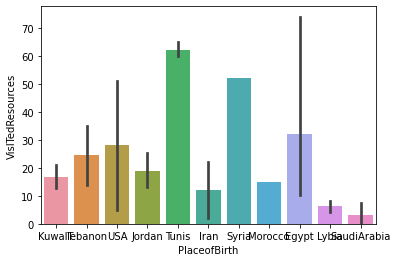

In [36]:
sns.barplot(x='PlaceofBirth',y='VisITedResources',data=e)

<AxesSubplot:xlabel='PlaceofBirth', ylabel='Discussion'>

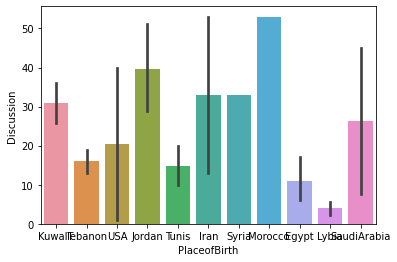

In [37]:
sns.barplot(x='PlaceofBirth',y='Discussion',data=e)

# resources,Disscussion are being not usefull enough in morocco and tunis.As being attending percentage is high. still,they contribute in low class.

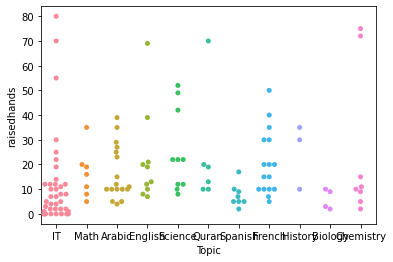

In [111]:
ax = sns.swarmplot(x="Topic", y="raisedhands", data=e)

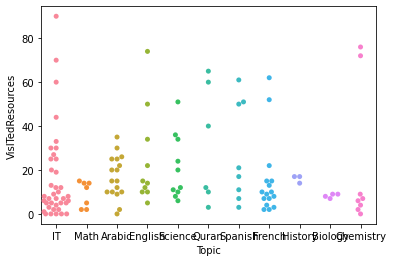

In [110]:
ax = sns.swarmplot(x="Topic", y="VisITedResources", data=e)

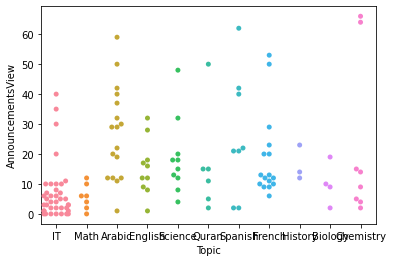

In [109]:
ax = sns.swarmplot(x="Topic", y="AnnouncementsView", data=e)

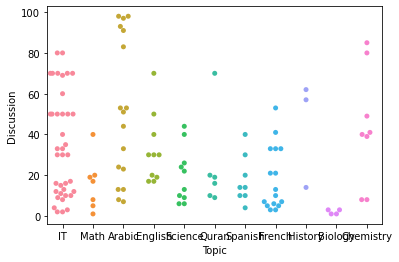

In [112]:
ax = sns.swarmplot(x="Topic", y="Discussion", data=e)

# languages which are majority such as spanish Math have very low response towards material resulting in low class.

In [24]:
e.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,127.000000,127.000000,127.000000,127.000000
mean,16.889764,18.322835,15.574803,30.834646
std,17.209368,19.187000,15.314440,25.710156
min,0.000000,0.000000,0.000000,1.000000
25%,6.000000,6.000000,4.500000,10.000000
50%,10.000000,11.000000,11.000000,21.000000
75%,20.500000,23.000000,20.000000,49.500000
max,80.000000,90.000000,66.000000,98.000000


# person who visited VisITedResources as 18,AnnouncementsView  as 16, raisedhand as 17,has most likely to get lower.

<AxesSubplot:xlabel='gender', ylabel='raisedhands'>

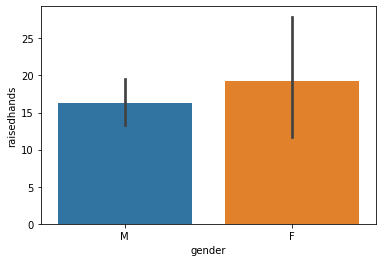

In [39]:
sns.barplot(x='gender',y='raisedhands',data=e)

<AxesSubplot:xlabel='gender', ylabel='VisITedResources'>

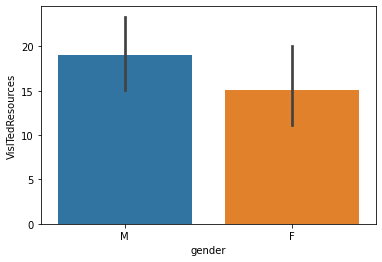

In [40]:
sns.barplot(x='gender',y='VisITedResources',data=e)

<AxesSubplot:xlabel='gender', ylabel='AnnouncementsView'>

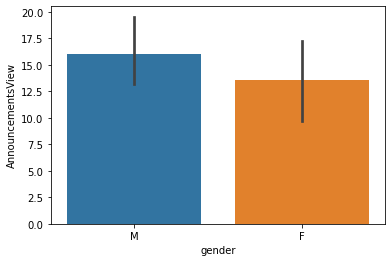

In [41]:
sns.barplot(x='gender',y='AnnouncementsView',data=e)

# Male percentage for using material is better compared to female. 

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

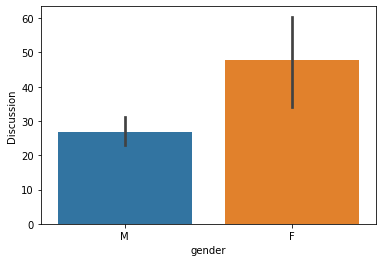

In [42]:
sns.barplot(x='gender',y='Discussion',data=e)

# Female who are more involved  than male,then also in low class.Discussion is not working for female.

# if male increases  percentage of Discussion  thy go in medium class.

<AxesSubplot:xlabel='gender', ylabel='count'>

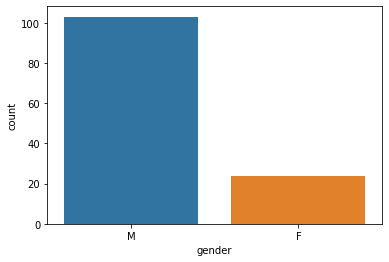

In [44]:
sns.countplot(x='gender',data=e)

# Male have majority in low class than.

# Male odds are litterally 4 times  of having a low class.

In [114]:
e.groupby('Relation').sum()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Relation,,,,
Father,1714,1805,1539,3583
Mum,431,522,439,333


<AxesSubplot:xlabel='Relation', ylabel='VisITedResources'>

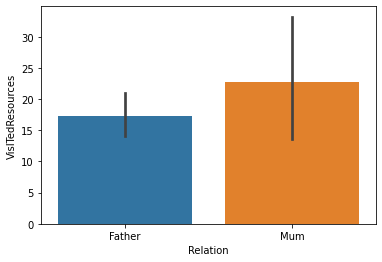

In [115]:
sns.barplot(x='Relation',y='VisITedResources',data=e)

<AxesSubplot:xlabel='Relation', ylabel='AnnouncementsView'>

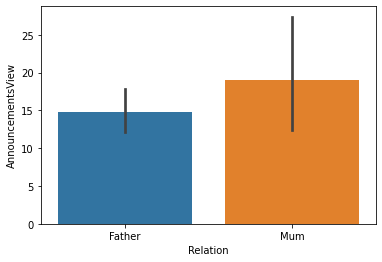

In [117]:
sns.barplot(x='Relation',y='AnnouncementsView',data=e)

<AxesSubplot:xlabel='Relation', ylabel='Discussion'>

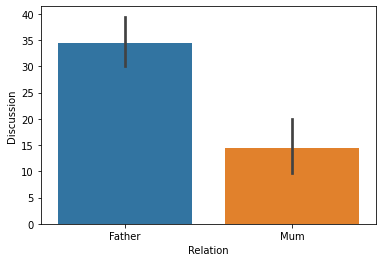

In [118]:
sns.barplot(x='Relation',y='Discussion',data=e)

<AxesSubplot:xlabel='Relation', ylabel='raisedhands'>

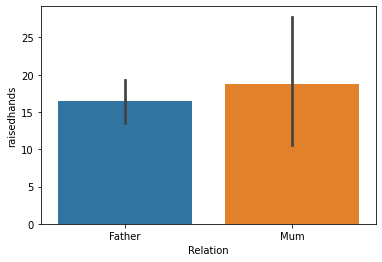

In [119]:
sns.barplot(x='Relation',y='raisedhands',data=e)

# mums are more contributing in use of material ,Father is contributing for participating Discussions for low class. 

# Q4 ends

# Q2 start

#  categorical features in relation to each other, to see what insights could be possibly read

<AxesSubplot:xlabel='PlaceofBirth'>

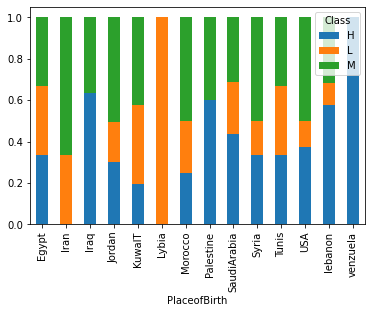

In [22]:
(pd.crosstab(df['PlaceofBirth'],df['Class'], 
             normalize='index')
   .plot.bar(stacked=True)
)


 # place of birth make a significant influence on class. 

<AxesSubplot:xlabel='ParentAnsweringSurvey'>

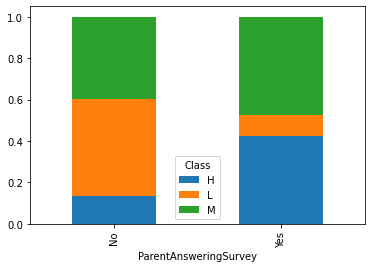

In [23]:
(pd.crosstab(df['ParentAnsweringSurvey'],df['Class'], 
             normalize='index')
   .plot.bar(stacked=True)
)


# parents who are not submitting surveys have low class.

<AxesSubplot:xlabel='StudentAbsenceDays'>

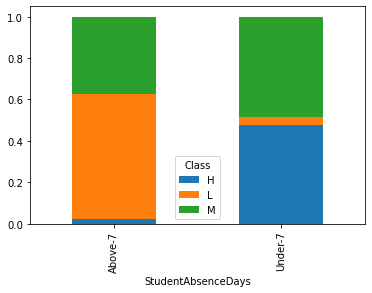

In [24]:
(pd.crosstab(df['StudentAbsenceDays'],df['Class'], 
             normalize='index')
   .plot.bar(stacked=True)
)


# People who are absent above-7 has majority of low class.People who are absent above-7 make a significant influence on class. 

<AxesSubplot:xlabel='gender'>

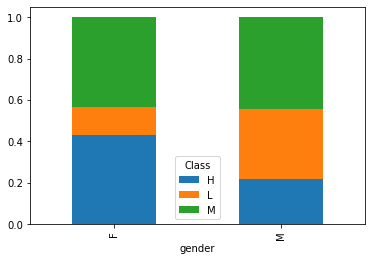

In [5]:
(pd.crosstab(df['gender'],df['Class'], 
             normalize='index')
   .plot.bar(stacked=True)
)


<AxesSubplot:xlabel='Topic'>

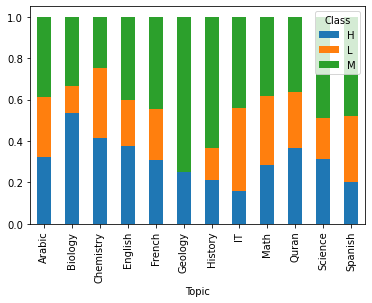

In [25]:
(pd.crosstab(df['Topic'],df['Class'], 
             normalize='index')
   .plot.bar(stacked=True)
)


# Biology have max high class.Languages make a significant influence in class.

<AxesSubplot:xlabel='Topic'>

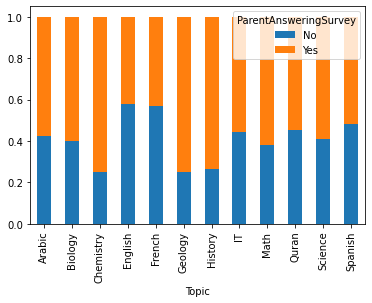

In [29]:
(pd.crosstab(df['Topic'],df['ParentAnsweringSurvey'], 
             normalize='index')
   .plot.bar(stacked=True)
)


# Topic wise french and English student, need most improvement.To get parent survey feedback.

<AxesSubplot:xlabel='StudentAbsenceDays'>

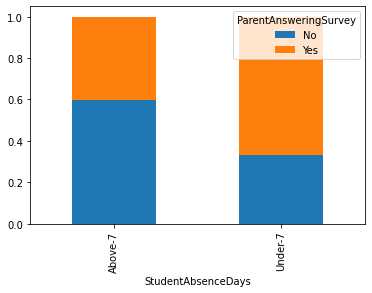

In [21]:
(pd.crosstab(df['StudentAbsenceDays'],df['ParentAnsweringSurvey'], 
             normalize='index')
   .plot.bar(stacked=True)
)


# ParentAnsweringSurvey should be properly feedback or looked through of students absent above-7, it will influence them to not be absent.

<AxesSubplot:xlabel='ParentschoolSatisfaction'>

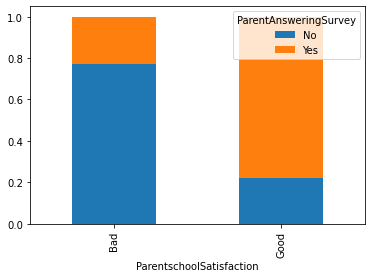

In [27]:
(pd.crosstab(df['ParentschoolSatisfaction'],df['ParentAnsweringSurvey'], 
             normalize='index')
   .plot.bar(stacked=True)
)


# if we could work on survey we could improve satisfaction percentage.

# Q2 ends

# Q3 start

# Visualize categorical variables with numerical variables and give conclusions

<AxesSubplot:xlabel='Class', ylabel='raisedhands'>

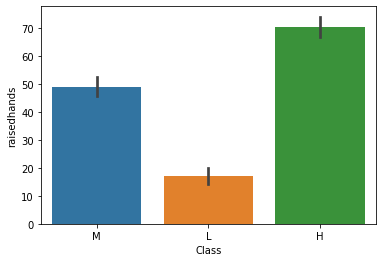

In [73]:
sns.barplot(x='Class',y='raisedhands',data=df)

<AxesSubplot:xlabel='Class', ylabel='VisITedResources'>

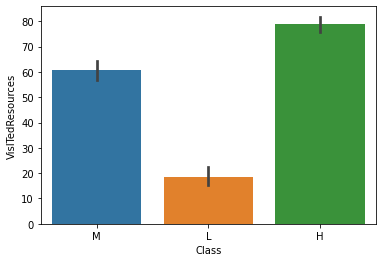

In [75]:
sns.barplot(x='Class',y='VisITedResources',data=df)

<AxesSubplot:xlabel='Class', ylabel='AnnouncementsView'>

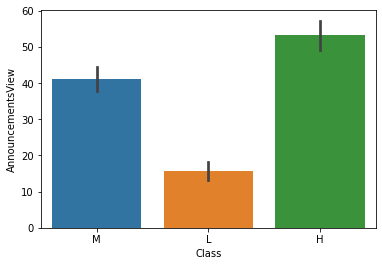

In [76]:
sns.barplot(x='Class',y='AnnouncementsView',data=df)

# Material is doublly used by people in higher class compared to medium.  

<AxesSubplot:ylabel='raisedhands'>

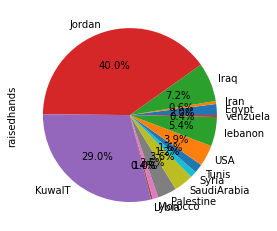

In [100]:
k.plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='VisITedResources'>

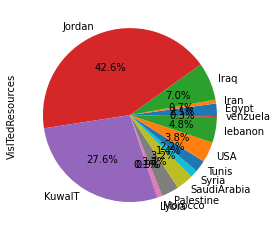

In [101]:
b.plot.pie(autopct="%.1f%%")

# iraq, iran, jordan, kuwait and lybia have considerable differnce with respect to resourse use.

<AxesSubplot:ylabel='AnnouncementsView'>

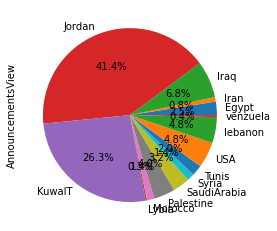

In [102]:
f.plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='Discussion'>

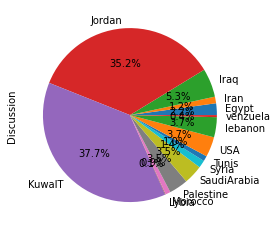

In [105]:
h.plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='VisITedResources'>

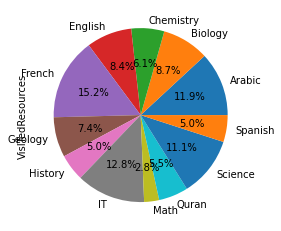

In [106]:
j.plot.pie(autopct="%.1f%%")

# Arabic, French, Science and IT have significant percentage visited resourses.

<AxesSubplot:ylabel='VisITedResources'>

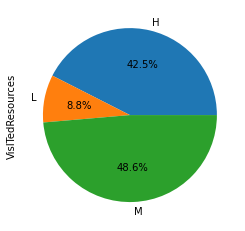

In [85]:
r.plot.pie(autopct="%.1f%%")

#  6 times lesser Resourses visited by students in lower class compared to high.

<AxesSubplot:ylabel='raisedhands'>

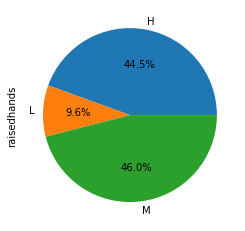

In [89]:
t.plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='AnnouncementsView'>

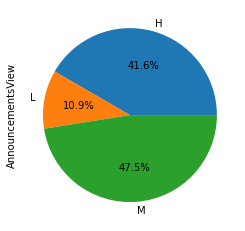

In [90]:
i.plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='Discussion'>

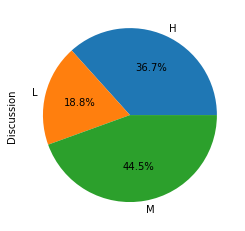

In [91]:
o.plot.pie(autopct="%.1f%%")

# Discussion are being attended by low class people,double the percentage of resourse visited. 

In [80]:
df.groupby('Topic').sum()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
Topic,,,,
Arabic,2567,3129,2317,2640
Biology,2022,2296,1545,1411
Chemistry,1382,1610,1053,936
English,2278,2217,1725,1984
French,2639,4006,2195,1722
Geology,1784,1959,1459,1268
History,1088,1308,1130,1237
IT,2946,3369,1762,4030
Math,791,734,595,884


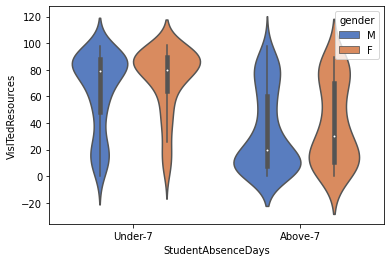

In [234]:
ax = sns.violinplot(x="StudentAbsenceDays", y="VisITedResources", hue="gender",
                    data=df, palette="muted")

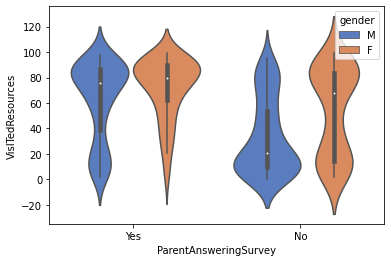

In [28]:
ax = sns.violinplot(x="ParentAnsweringSurvey", y="VisITedResources", hue="gender",
                    data=df, palette="muted")

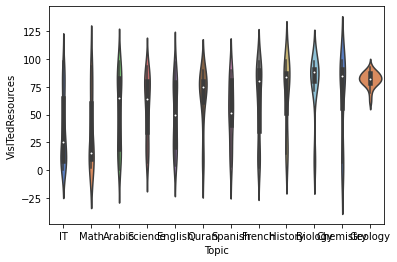

In [31]:
ax = sns.violinplot(x="Topic", y="VisITedResources",
                    data=df, palette="muted")

# countries with languages above, have a significant impact on raising hands and visting resourses, which has an impact on class levels.

In [ ]:
data2 = df.groupby("gender")["VisITedResources"].sum()
data2

<AxesSubplot:ylabel='VisITedResources'>

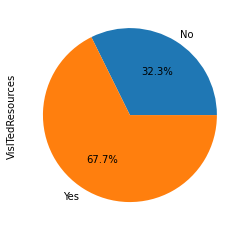

In [18]:
data.plot.pie(autopct="%.1f%%")

# for ParentAnsweringSurvey, double the percentage of parent answering survey will visit the resourses.

<AxesSubplot:ylabel='VisITedResources'>

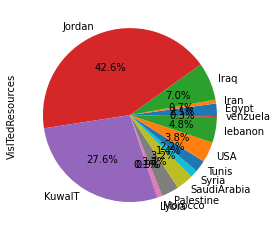

In [20]:
data1.plot.pie(autopct="%.1f%%")

In [21]:
data2 = df.groupby("gender")["VisITedResources"].sum()
data2

gender
F    11200
M    15103
Name: VisITedResources, dtype: int64

<AxesSubplot:ylabel='VisITedResources'>

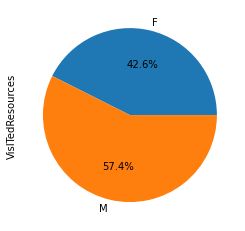

In [22]:

data2.plot.pie(autopct="%.1f%%")

# comparitive to female male have vistedresourses more than 15% still they have 4 times more odds for getting low class.

<AxesSubplot:ylabel='raisedhands'>

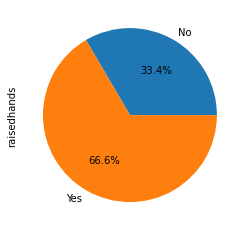

In [24]:
data.plot.pie(autopct="%.1f%%")

<AxesSubplot:ylabel='raisedhands'>

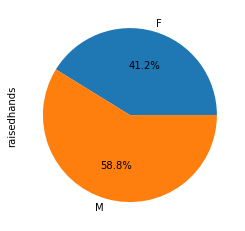

In [26]:
data2.plot.pie(autopct="%.1f%%")

# comparitive to female male have raisedhands more than 15% still they have 4 times more odds for getting low class.

# Q3 ends

# Q1 start 

# Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that.

<AxesSubplot:xlabel='Topic', ylabel='count'>

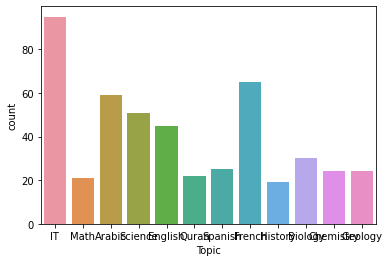

In [46]:
sns.countplot(x='Topic',data=df)

#  It,Arabic,French  has majority compared to other languages.

<AxesSubplot:xlabel='ParentschoolSatisfaction', ylabel='count'>

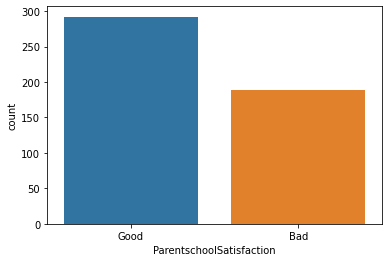

In [47]:
sns.countplot(x='ParentschoolSatisfaction',data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

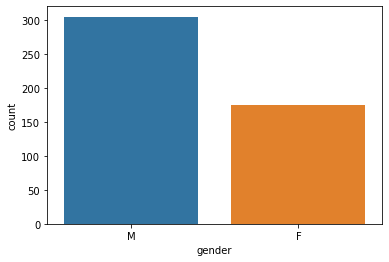

In [54]:
sns.countplot(x='gender',data=df)

<AxesSubplot:xlabel='Class', ylabel='count'>

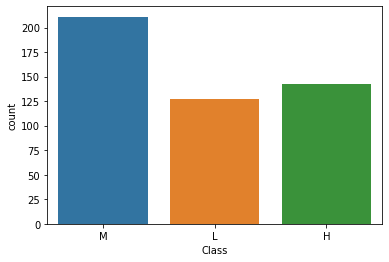

In [48]:
sns.countplot(x='Class',data=df)

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='count'>

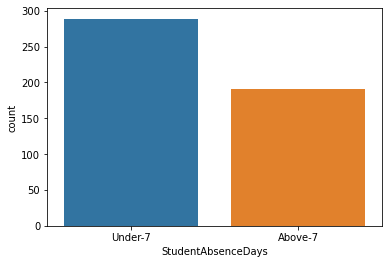

In [49]:
sns.countplot(x='StudentAbsenceDays',data=df)

# Data has a sufficient lower class percentage in camparsion to range of higher class. we can conclude that, data is not baised its is suffiently distributed in higher medium and lower.

<AxesSubplot:xlabel='PlaceofBirth', ylabel='count'>

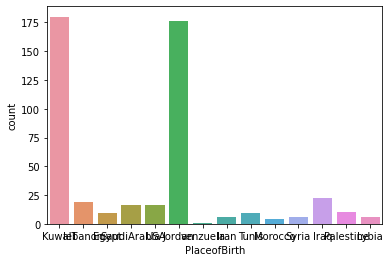

In [50]:
sns.countplot(x='PlaceofBirth',data=df)

# very high variance is from kuwait and jordan ,which means model will better predict for kuwait and jordan,than others.Data should be grouped.Then, it will accurately predict for non-kuwait and jordan also.

<AxesSubplot:xlabel='PlaceofBirth'>

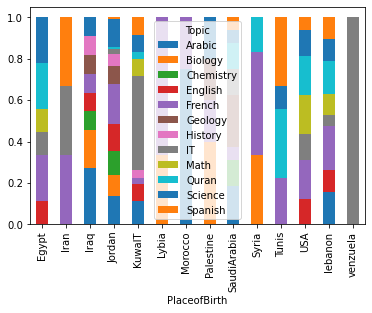

In [51]:
(pd.crosstab(df['PlaceofBirth'],df['Topic'], 
             normalize='index')
   .plot.bar(stacked=True)
)


<AxesSubplot:xlabel='PlaceofBirth'>

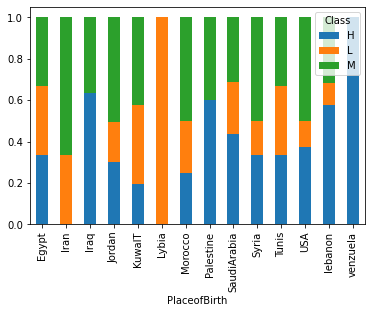

In [52]:
(pd.crosstab(df['PlaceofBirth'],df['Class'], 
             normalize='index')
   .plot.bar(stacked=True)
)


# It, spanish and arabic languages, we could say contribute to chances of higher class.

<AxesSubplot:xlabel='PlaceofBirth'>

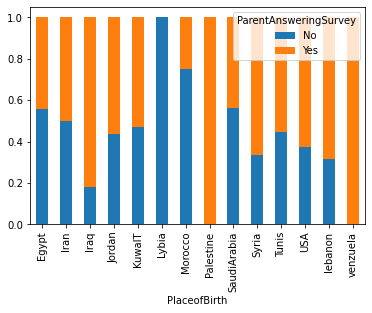

In [53]:
(pd.crosstab(df['PlaceofBirth'],df['ParentAnsweringSurvey'], 
             normalize='index')
   .plot.bar(stacked=True)
)


# parents who are answering surveys, we could say are more focused on child resulting in higher class in  venzulela,Iraq,Palestine.Parents who are not answering surveys, we could say are less focused on child resulting in lower class in  lybia.

# Q1 ends

# Q5 starts 

In [52]:
df.isnull().sum()


gender                      0
PlaceofBirth                0
Topic                       0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [53]:
# Qualitative Variable
Quantitative_Variable = df[df.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30


In [54]:
def remove_outlier(dp):
                for i in dp.columns:
                    q1 = dp[i].quantile(0.25)
                    q3 = dp[i].quantile(0.75)
                    iqr = q3-q1 #Interquartile range
                    upper_limit = q3+1.5*iqr #acceptable range
                    lower_limit = q3-1.5*iqr
                    if ((dp[i].dtype=='float64')| (dp[i].dtype=='int64')):
                        dp[i][dp[i]>=upper_limit]=upper_limit
                        dp[i][dp[i]<=lower_limit]=lower_limit
                    else:
                        dp[i]=dp[i]
                return (dp)
remove_outlier(Quantitative_Variable)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50
...,...,...,...,...
475,5,4,5,8
476,50,77,14,28
477,55,74,25,29
478,30,17,14,57


In [55]:
df.corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


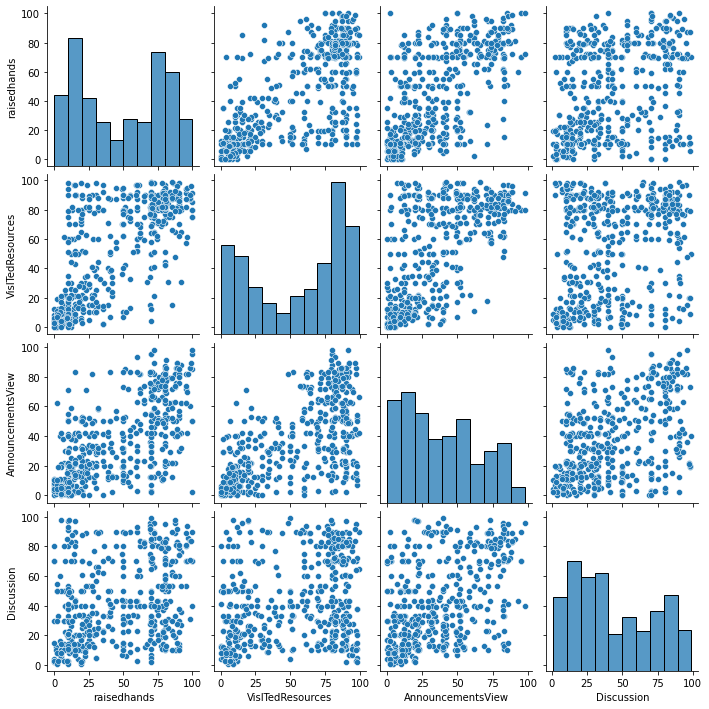

In [56]:
sns.pairplot(df)

In [57]:

Qualitative_Variable = df[df.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(200)

,gender,PlaceofBirth,Topic,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KuwaIT,IT,Father,Yes,Good,Under-7,M
1,M,KuwaIT,IT,Father,Yes,Good,Under-7,M
2,M,KuwaIT,IT,Father,No,Bad,Above-7,L
3,M,KuwaIT,IT,Father,No,Bad,Above-7,L
4,M,KuwaIT,IT,Father,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...
195,M,KuwaIT,Arabic,Father,Yes,Good,Under-7,M
196,M,KuwaIT,Arabic,Mum,Yes,Good,Under-7,H
197,M,KuwaIT,Arabic,Mum,No,Bad,Under-7,H
198,M,Morocco,Arabic,Father,No,Bad,Above-7,L


In [58]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,gender,PlaceofBirth,Topic,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,7,0,1,1,1,2
1,1,4,7,0,1,1,1,2
2,1,4,7,0,0,0,0,1
3,1,4,7,0,0,0,0,1
4,1,4,7,0,0,0,0,2


In [59]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,gender,PlaceofBirth,Topic,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,4,7,0,1,1,1,2,15,16,2,20
1,1,4,7,0,1,1,1,2,20,20,3,25
2,1,4,7,0,0,0,0,1,10,7,0,30
3,1,4,7,0,0,0,0,1,30,25,5,35
4,1,4,7,0,0,0,0,2,40,50,12,50


In [60]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Class', axis = 1)
Y = Final_combined[['Class']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=56)

In [15]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,gender,PlaceofBirth,Topic,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
229,1,4,11,0,0,0,0,5,17,21,10,1
394,1,7,1,1,1,1,1,78,91,50,40,0
453,0,3,5,0,1,1,0,29,78,40,12,2
403,1,3,1,0,0,1,1,65,89,64,82,0
23,1,4,7,0,0,0,0,2,0,2,50,1


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train)

In [62]:
output.intercept_ 

array([-1.12611093,  0.94071612,  0.1853948 ])

In [63]:
output.coef_

array([[-1.24256630e+00, -3.52232866e-02, -1.31320321e-01,
         6.60512608e-01,  5.24074534e-01,  1.52367701e-01,
         1.09757357e+00,  2.00684603e-02,  2.64542290e-03,
         6.47583942e-03,  5.11463339e-03],
       [ 1.05414069e+00,  6.86213313e-02,  9.84188854e-02,
         1.40874516e-01, -5.76954666e-01, -1.67943410e-01,
        -1.22244790e+00, -2.37177011e-02, -1.81216303e-02,
        -1.11382907e-02,  1.23568891e-03],
       [ 1.88425614e-01, -3.33980447e-02,  3.29014361e-02,
        -8.01387125e-01,  5.28801322e-02,  1.55757090e-02,
         1.24874324e-01,  3.64924078e-03,  1.54762074e-02,
         4.66245127e-03, -6.35032230e-03]])

In [64]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,gender,PlaceofBirth,Topic,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
229,1,4,11,0,0,0,0,5,17,21,10,1
394,1,7,1,1,1,1,1,78,91,50,40,0
453,0,3,5,0,1,1,0,29,78,40,12,2
403,1,3,1,0,0,1,1,65,89,64,82,0
23,1,4,7,0,0,0,0,2,0,2,50,1


In [65]:
train['Predicted']=output.predict(X_train)
train.head()

,gender,PlaceofBirth,Topic,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted
229,1,4,11,0,0,0,0,5,17,21,10,1,1
394,1,7,1,1,1,1,1,78,91,50,40,0,0
453,0,3,5,0,1,1,0,29,78,40,12,2,2
403,1,3,1,0,0,1,1,65,89,64,82,0,2
23,1,4,7,0,0,0,0,2,0,2,50,1,1


In [66]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Class'])
matrix

array([[ 67,   0,  37],
       [  0,  69,  13],
       [ 35,  15, 100]], dtype=int64)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(train['Class'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       102
           1       0.84      0.82      0.83        84
           2       0.67      0.67      0.67       150

    accuracy                           0.70       336
   macro avg       0.72      0.71      0.72       336
weighted avg       0.70      0.70      0.70       336



# Final model below 

In [68]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,gender,PlaceofBirth,Topic,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
103,1,4,7,0,0,0,0,1,7,6,10,1
134,1,4,9,0,1,1,1,80,80,15,70,0
435,1,3,2,1,1,1,0,79,88,79,20,2
91,1,4,7,0,1,1,1,80,90,55,19,0
246,0,4,10,0,1,1,1,80,94,62,77,0


In [69]:
test['Predicted']=output.predict(X_test)
test.head()

,gender,PlaceofBirth,Topic,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted
103,1,4,7,0,0,0,0,1,7,6,10,1,1
134,1,4,9,0,1,1,1,80,80,15,70,0,2
435,1,3,2,1,1,1,0,79,88,79,20,2,2
91,1,4,7,0,1,1,1,80,90,55,19,0,2
246,0,4,10,0,1,1,1,80,94,62,77,0,2


In [70]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Class'])
print(matrix)

[[30  0 13]
 [ 0 37  8]
 [10  6 40]]


In [71]:
from sklearn.metrics import classification_report
print(classification_report(test['Class'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72        40
           1       0.82      0.86      0.84        43
           2       0.71      0.66      0.68        61

    accuracy                           0.74       144
   macro avg       0.74      0.76      0.75       144
weighted avg       0.74      0.74      0.74       144



In [72]:
output.intercept_,output.coef_

(array([-1.12611093,  0.94071612,  0.1853948 ]),
 array([[-1.24256630e+00, -3.52232866e-02, -1.31320321e-01,
          6.60512608e-01,  5.24074534e-01,  1.52367701e-01,
          1.09757357e+00,  2.00684603e-02,  2.64542290e-03,
          6.47583942e-03,  5.11463339e-03],
        [ 1.05414069e+00,  6.86213313e-02,  9.84188854e-02,
          1.40874516e-01, -5.76954666e-01, -1.67943410e-01,
         -1.22244790e+00, -2.37177011e-02, -1.81216303e-02,
         -1.11382907e-02,  1.23568891e-03],
        [ 1.88425614e-01, -3.33980447e-02,  3.29014361e-02,
         -8.01387125e-01,  5.28801322e-02,  1.55757090e-02,
          1.24874324e-01,  3.64924078e-03,  1.54762074e-02,
          4.66245127e-03, -6.35032230e-03]]))

# 75% of high class is captured  of high class share of test data.86% of low class is captured  of low class share of test data. 66% of medium class is captured  of medium class share of test data.Accuracy of model is 74%.

# Q5 ends


#  Search for important features

# we get important features as visited resourses,announcement,raised hands,studentabsence,parent satisfaction,discussion from decision tree.